# BST 270: Individual project
Reproducible Data Science: Covid response (FiveThirtyEight)

## Introduction

The following notebook aims to satisfy the requirements for the individual project component of BST 270: Reproducible Data Science, taken Winter 2025.

## Motivations and Reproducibility

My aim is to reproduce four figures from FiveThirtyEight's [How Americans View Biden's Response To The Coronavirus Crisis?](https://projects.fivethirtyeight.com/coronavirus-polls/). 

I will utilize a dataset that contains the calculated daily averages for the approval polls, which is located at `./data/covid_approval_toplines.csv`.

## Setup

Before running the code, make sure you have installed all required packages.

In [1]:
!pip install -r requirements.txt

We need to import these packages to reproduce figures.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
# Read and process data
df = pd.read_csv('data/covid_approval_toplines.csv')
df['modeldate'] = pd.to_datetime(df['modeldate'])

In [4]:
df

,subject,modeldate,party,approve_estimate,disapprove_estimate,timestamp
0,Biden,2022-11-27,R,18.600346,74.286830,02:31:21 27 Nov 2022
1,Biden,2022-11-27,D,80.877207,12.768451,02:31:11 27 Nov 2022
2,Biden,2022-11-27,I,37.505047,43.829976,02:31:16 27 Nov 2022
3,Biden,2022-11-27,all,47.825175,41.823056,02:31:28 27 Nov 2022
4,Biden,2022-11-26,D,80.877207,12.768451,02:31:13 27 Nov 2022
...,...,...,...,...,...,...
5636,Trump,2020-02-16,I,41.357480,23.846170,17:45:25 2 Apr 2020
5637,Trump,2020-02-15,R,80.400760,5.410971,17:45:39 2 Apr 2020
5638,Trump,2020-02-15,I,41.357480,23.846170,17:45:25 2 Apr 2020
5639,Trump,2020-02-15,all,46.820010,26.486840,17:45:54 2 Apr 2020


## Reproduces figures
### Figure 1

The first figure plots the change of approval and disapproval rate of Biden's response to coronavirus.

In [5]:
df_allparty = df[df['party'] == 'all']
df_biden = df_allparty[df_allparty['subject'] == 'Biden']
df_biden

,subject,modeldate,party,approve_estimate,disapprove_estimate,timestamp
3,Biden,2022-11-27,all,47.825175,41.823056,02:31:28 27 Nov 2022
7,Biden,2022-11-26,all,47.825175,41.823056,02:31:30 27 Nov 2022
11,Biden,2022-11-25,all,47.825175,41.823056,02:31:32 27 Nov 2022
15,Biden,2022-11-24,all,47.825175,41.823056,06:11:18 24 Nov 2022
19,Biden,2022-11-23,all,47.825175,41.823056,08:45:15 23 Nov 2022
...,...,...,...,...,...,...
4245,Biden,2021-01-26,all,60.618850,27.486540,11:11:15 8 Feb 2021
4257,Biden,2021-01-25,all,69.000000,30.082310,11:11:16 8 Feb 2021
4260,Biden,2021-01-24,all,69.000000,30.082310,11:11:17 8 Feb 2021
4265,Biden,2021-01-23,all,69.000000,30.082310,11:11:17 8 Feb 2021


Text(0.5, 1.0, "Do Americans approve of Biden's response to the coronavirus crisis?")

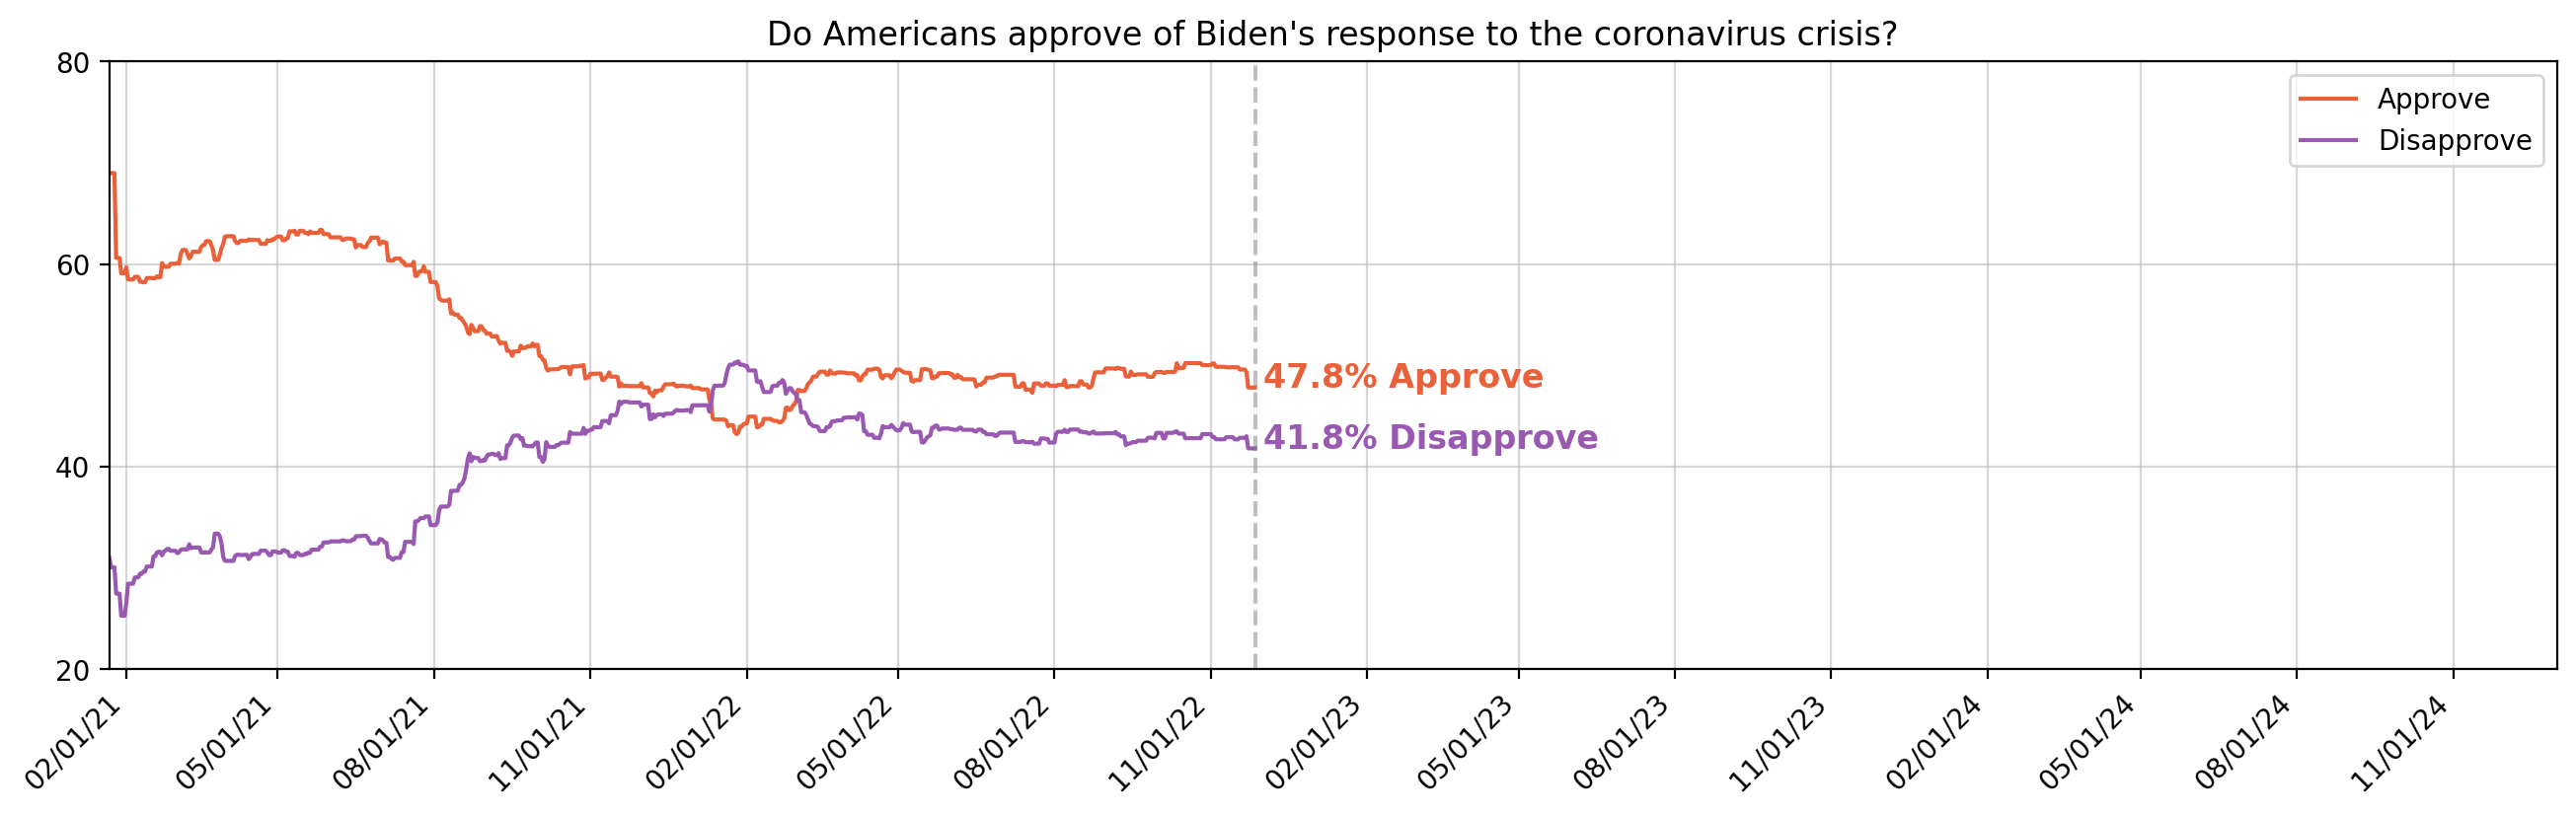

In [6]:
plt.figure(figsize=(16, 4), dpi=200)
colors = ['#EA6038', '#9959B1']

# lineplot
sns.lineplot(data=df_biden, x='modeldate', y='approve_estimate', color=colors[0], label='Approve')
sns.lineplot(data=df_biden, x='modeldate', y='disapprove_estimate', color=colors[1], label='Disapprove')

# add static text and annotations
# approve
approve_final_x = df_biden['modeldate'].max()
x_offset = pd.to_timedelta('5D')
approve_final_y = df_biden.loc[df_biden['modeldate'] == approve_final_x, 'approve_estimate'].values[0]
plt.text(
    approve_final_x + x_offset, 
    approve_final_y, 
    f'{approve_final_y:.1f}% Approve', 
    color=colors[0], 
    fontsize=12, 
    fontdict={'weight': 'bold'}
)
# disapprove
disapprove_final_x = df_biden['modeldate'].max()
x_offset = pd.to_timedelta('5D')
disapprove_final_y = df_biden.loc[df_biden['modeldate'] == disapprove_final_x, 'disapprove_estimate'].values[0]
plt.text(
    disapprove_final_x + x_offset, 
    disapprove_final_y, 
    f'{disapprove_final_y:.1f}% Disapprove', 
    color=colors[1], 
    fontsize=12, 
    fontdict={'weight': 'bold'}
)
# the dash line
plt.axvline(x=approve_final_x, color='gray', linestyle='--', alpha=0.5)

# plotting aesthetics
# remove x, y labels
plt.ylabel('')
plt.xlabel('')
# set yticks
plt.yticks([20, 40, 60, 80])
# set xticks
monthly_ticks = pd.date_range(start=df_biden['modeldate'].min(), end=pd.to_datetime('2025-01-01'), freq='3MS')
plt.xticks(monthly_ticks, rotation=45, ha='right')
ax = plt.gca() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y')) # format xticks dates
# set x, y limits
plt.ylim(20, 80)
plt.xlim(df_biden['modeldate'].min(), pd.to_datetime('2025-01-01'))
# grid and title
plt.grid(True, alpha=0.5);
plt.title('Do Americans approve of Biden\'s response to the coronavirus crisis?')

_Comment on reproducibility:_

The reproduced figure closely resembles the original one.

### Figure 2

The second figure plots the change of approval and disapproval rate of Trump's response to coronavirus.

Text(0.5, 1.0, 'Do Americans approve of Trump’s response to the coronavirus crisis?')

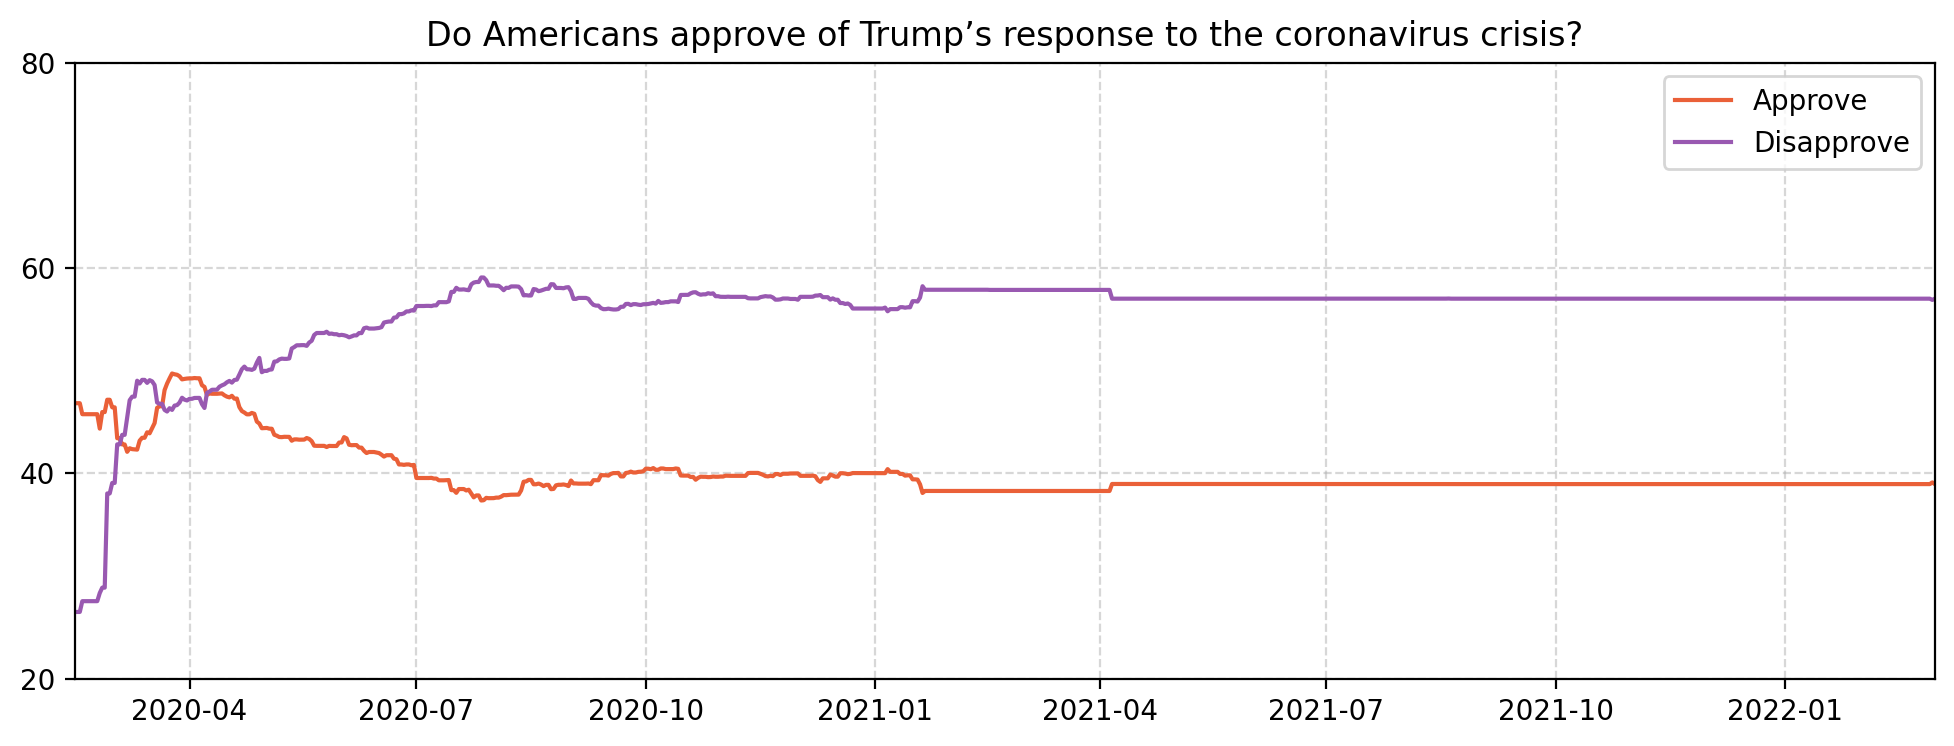

In [7]:
# data preparation
# plotting
df_trump = df_allparty[df_allparty['subject'] == 'Trump']
plt.figure(figsize=(12, 4), dpi=200)
sns.lineplot(data=df_trump, x='modeldate', y='approve_estimate', color=colors[0], label='Approve')
sns.lineplot(data=df_trump, x='modeldate', y='disapprove_estimate', color=colors[1], label='Disapprove')
# aesthetics
plt.ylim(20, 80)
plt.xlim(df_trump['modeldate'].min(), df_trump['modeldate'].max())
plt.ylabel('')
plt.xlabel('')
plt.yticks([20, 40, 60, 80])
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Do Americans approve of Trump’s response to the coronavirus crisis?')

_Comment on reproducibility:_

The latter portion of this plot has different trend as the original one.

### Figure 3
The third figure shows the change of approval rate separated by parties.

In [8]:
df_RDI = df[df['party'].isin(['R', 'D', 'I'])]
df_RDI.loc[:, 'party_plot'] = df_RDI['party'].map({
    'R': 'Republicans',
    'D': 'Democrats', 
    'I': 'Independents'
})

/var/folders/l1/3tjxrm457_3__m3s2nw9x2zm0000gn/T/ipykernel_24494/3254612050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RDI.loc[:, 'party_plot'] = df_RDI['party'].map({


Text(0.5, 1.0, 'Approval of Biden’s response varies widely by party')

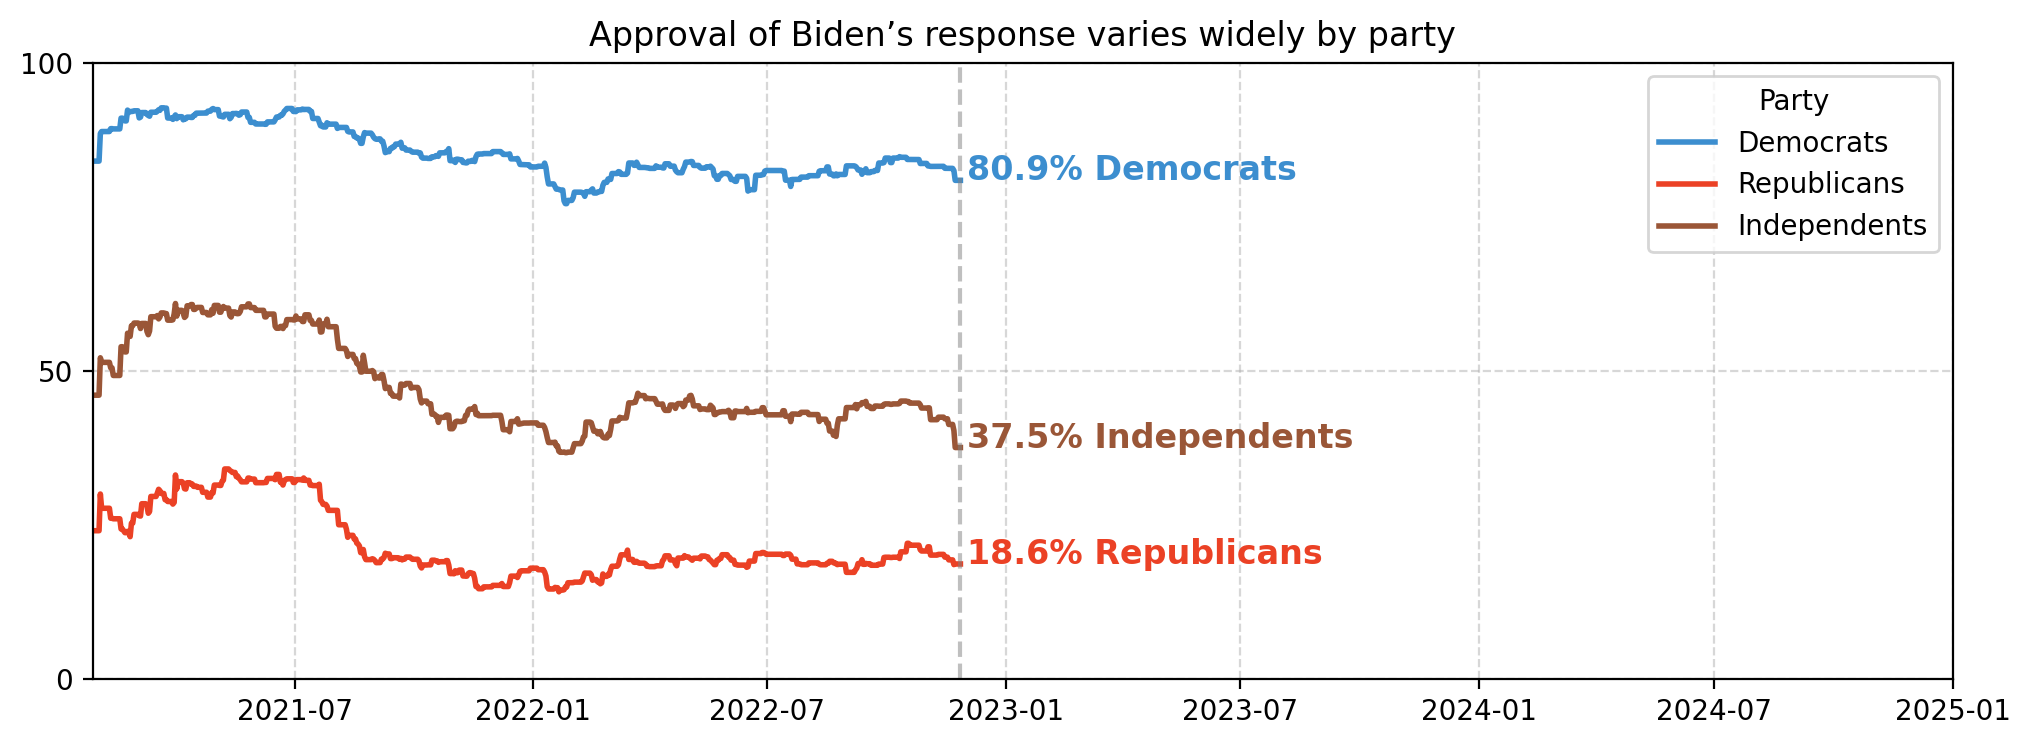

In [9]:
df_RDI_biden = df_RDI[df_RDI['subject'] == 'Biden']
palette = {'Democrats': '#3c8ecf', 'Republicans': '#eb4125', 'Independents': '#9a5637'}

plt.figure(figsize=(12, 4), dpi=200)
sns.lineplot(
    data=df_RDI_biden, 
    x='modeldate', 
    y='approve_estimate', 
    hue='party_plot', 
    palette=palette,
    hue_order=palette.keys(), 
    linewidth=2 
)

# add static text and annotations
x_offset = pd.to_timedelta('5D')
final_x = df_RDI_biden['modeldate'].max()
for party in palette.keys():
    df_slice = df_RDI_biden[df_RDI_biden['party_plot'] == party]
    D_final_y = df_slice.loc[df_slice['modeldate'] == final_x, 'approve_estimate'].values[0]
    plt.text(
        final_x + x_offset, 
        D_final_y, 
        f'{D_final_y:.1f}% {party}', 
        color=palette[party], 
        fontsize=12, 
        fontdict={'weight': 'bold'}
    )
plt.axvline(x=final_x, color='gray', linestyle='--', alpha=0.5)

# remove x, y labels
plt.ylabel('')
plt.xlabel('')

# set x, y limits
plt.ylim(0, 100)
plt.xlim(df_RDI_biden['modeldate'].min(), pd.to_datetime('2025-01-01'))

# set yticks
plt.yticks([0, 50, 100])

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Party')
plt.title("Approval of Biden’s response varies widely by party")

_Comment on reproducibility:_

The reproduced figure closely resembles the original figure.

### Figure 4

Text(0.5, 1.0, "Approval of Trump's response varies widely by party")

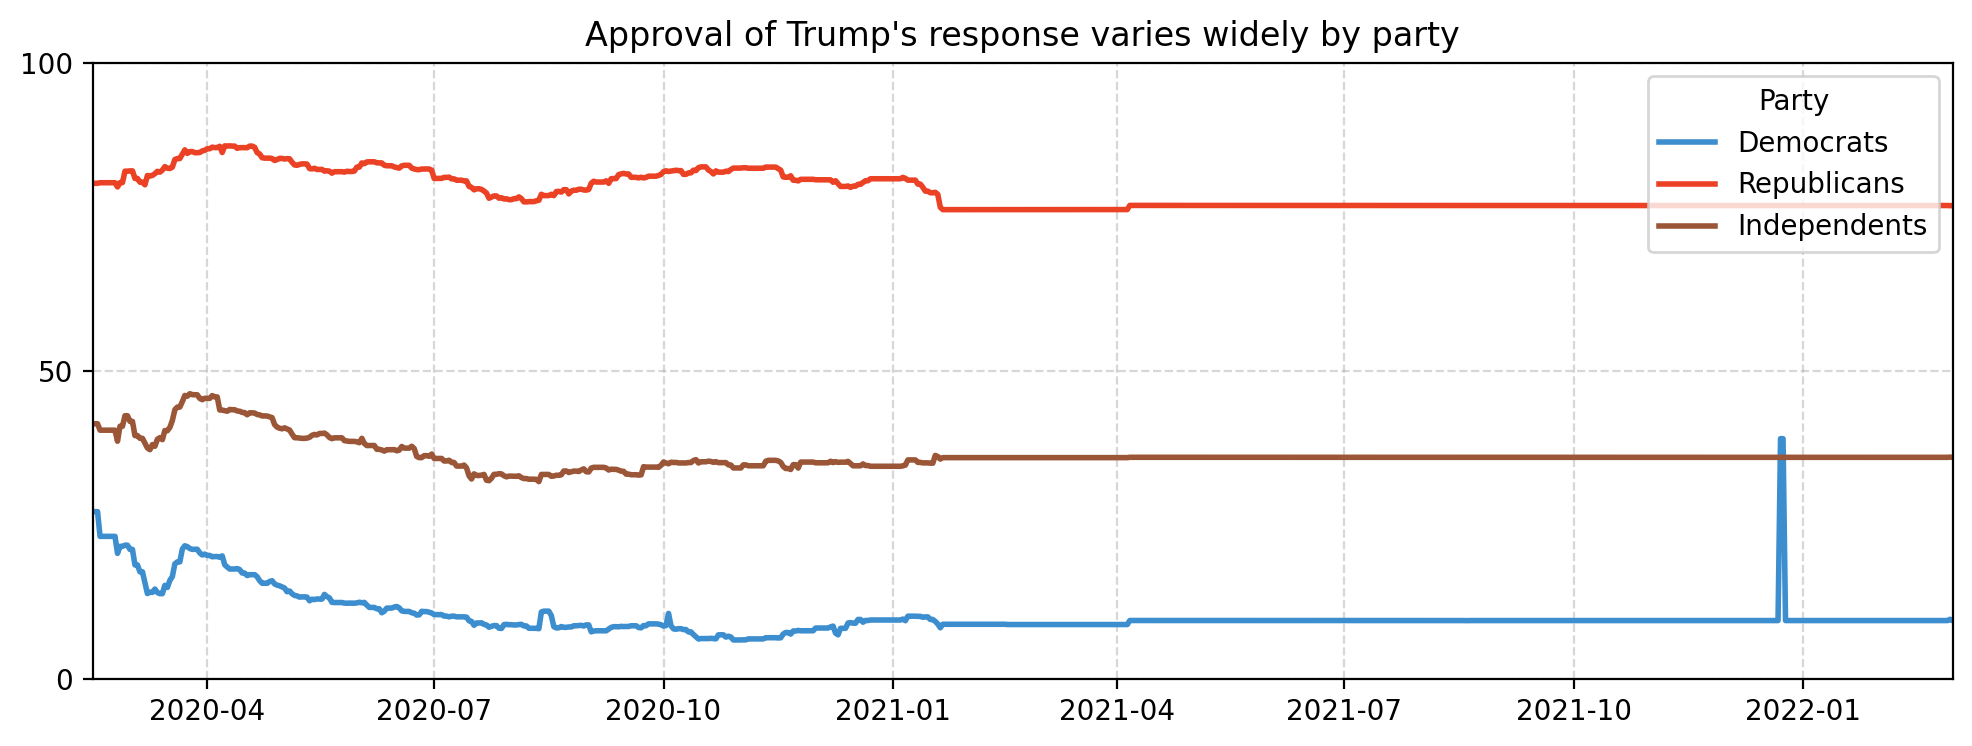

In [10]:
df_RDI_trump = df_RDI[df_RDI['subject'] == 'Trump']

plt.figure(figsize=(12, 4), dpi=200)
sns.lineplot(
    data=df_RDI_trump, 
    x='modeldate', 
    y='approve_estimate', 
    hue='party_plot', 
    palette={'Democrats': '#3c8ecf', 'Republicans': '#eb4125', 'Independents': '#9a5637'},
    hue_order=['Democrats', 'Republicans', 'Independents'], 
    linewidth=2 
)
# remove x, y labels
plt.ylabel('')
plt.xlabel('')


# set x, y limits
plt.ylim(0, 100)
plt.xlim(df_RDI_trump['modeldate'].min(), df_RDI_trump['modeldate'].max())

# set yticks
plt.yticks([0, 50, 100])

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Party', loc='upper right')
plt.title("Approval of Trump's response varies widely by party")

_Comment on reproducibility:_

In the original figure, the Republican percentage starts higher but shows a steady decline, while the Democrat percentage rises more consistently. My reproduction shows more abrupt changes at the beginning and end of the timeline.

From the figure, it seems that the author applied some filter to the values, but this information is not specified in the article.


## Limitations

Overall, this notebook successfully reproduced the figures in the original article. Figures about Biden's response is more accurate than Trump's.